In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

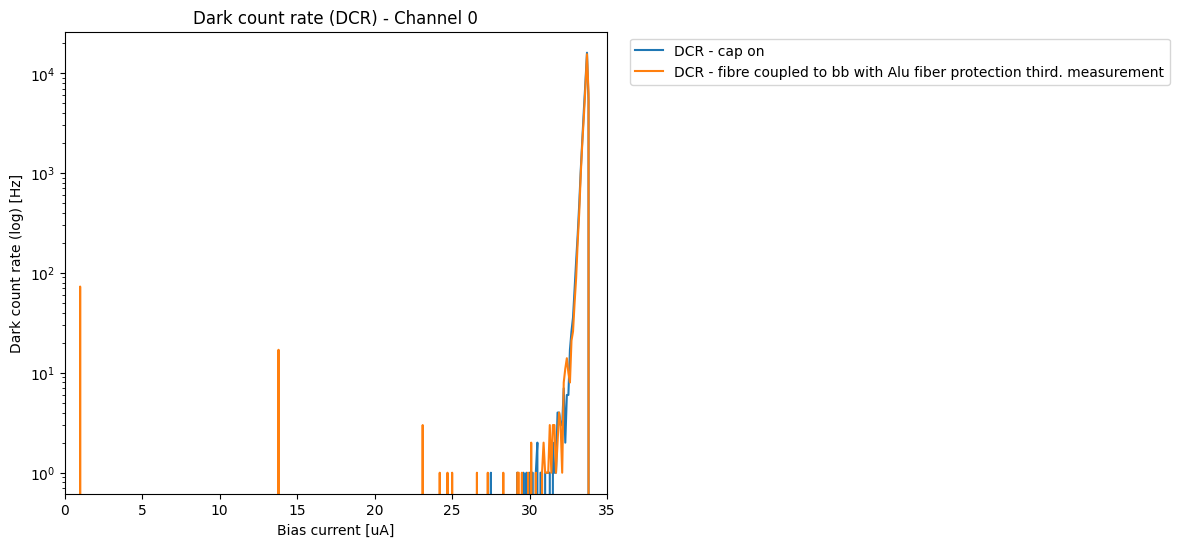

In [42]:
data_on = np.loadtxt('DCR Rate\HQO_04062024_SNSPD_DCR_Cap_on.txt', skiprows=16, usecols=range(9,17))
data_off = np.loadtxt("DCR Rate\HQO_05062024_SNSPD_DCR_Cap_off_ch1.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_exp = np.loadtxt("DCR Rate\HQO_06062024_SNSPD_DCR_coupled_laser_off.txt", skiprows=16, usecols=range(9,17))
data_uncoupled_to_exp = np.loadtxt("DCR Rate\HQO_20240606_DCR_couppled_no_laser.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_bb = np.loadtxt("DCR Rate\HQO_19062024_DCR_BlackBox_fiber_unprotected.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_bb_prot = np.loadtxt("DCR Rate\HQO_19062024_DCR_BlackBox_fiber_Aluprotected.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_bb_prot_2 = np.loadtxt("DCR Rate\HQO__2024-06-20--07-42-56_Counts_vs_Bias.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_bb_prot_3 = np.loadtxt("DCR Rate\HQO__2024-06-20--09-06-07_Counts_vs_Bias.txt", skiprows=16, usecols=range(9,17))

channel = 0

plt.plot(np.linspace(0,40,len(data_on[:,channel])), data_on[:,channel], label="DCR - cap on")
# plt.plot(np.linspace(0,40,len(data_off[:,channel])), data_off[:,channel], label="DCR - cap off")
# plt.plot(np.linspace(0,40,len(data_coupled_to_exp[:,channel])), data_coupled_to_exp[:,channel], label="DCR - fibre coupled no bb - laser off")
# plt.plot(np.linspace(0,40,len(data_uncoupled_to_exp[:,channel])), data_uncoupled_to_exp[:,channel], label="DCR - fibre uncoupled - hanging loose")
# plt.plot(np.linspace(0,40,len(data_coupled_to_bb[:,channel])), data_coupled_to_bb[:,channel], label="DCR - fibre coupled to bb no fiber protection")
# plt.plot(np.linspace(0,40,len(data_coupled_to_bb_prot[:,channel])), data_coupled_to_bb_prot[:,channel], label="DCR - fibre coupled to bb with Alu fiber protection first measurement")
# plt.plot(np.linspace(0,40,len(data_coupled_to_bb_prot_2[:,channel])), data_coupled_to_bb_prot_2[:,channel], label="DCR - fibre coupled to bb with Alu fiber protection sec. measurement")
plt.plot(np.linspace(0,40,len(data_coupled_to_bb_prot_3[:,channel])), data_coupled_to_bb_prot_3[:,channel], label="DCR - fibre coupled to bb with Alu fiber protection third. measurement")

plt.yscale("log")
plt.xlim(left=0, right=35)
plt.title(f'Dark count rate (DCR) - Channel {channel}')
plt.ylabel('Dark count rate (log) [Hz]')
plt.xlabel('Bias current [uA]')
plt.legend(loc='best', bbox_to_anchor=(1, 0., 1.05, 1))
# Adjust figure size to accommodate legend
fig = plt.gcf()
fig.set_size_inches(7, 6)

# Save figure with bbox_inches to include legend
plt.savefig(f"DCR Rate/HQO_20240620_DCR_Channel_{channel}__fibre_coupled_to_bb_with_Alu_fiber_comp_to_cap_on", bbox_inches='tight')

<Figure size 640x480 with 0 Axes>